In [1]:
# pip install pandas

# pip install matplotlib

In [2]:
# pip install -U scikit-learn

In [3]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

In [4]:
# 读取数据
df = pd.read_csv("https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2.csv")
X = df.drop(['Name','ORR'], axis=1)
Y = df['ORR']

In [5]:
df.iloc[[0,1]]

,Name,ORR,original.shape.VoxelVolume,original.shape.Maximum3DDiameter,original.shape.MeshVolume,original.shape.MajorAxisLength,original.shape.Sphericity,original.shape.LeastAxisLength,original.shape.Elongation,original.shape.SurfaceVolumeRatio,...,original.glszm.HighGrayLevelZoneEmphasis,original.glszm.SmallAreaEmphasis,original.glszm.LowGrayLevelZoneEmphasis,original.glszm.ZoneEntropy,original.glszm.SmallAreaLowGrayLevelEmphasis,original.ngtdm.Coarseness,original.ngtdm.Complexity,original.ngtdm.Strength,original.ngtdm.Contrast,original.ngtdm.Busyness
0,Chen Zhi,1,72932.16866,89.441729,72614.8736,70.159054,0.634966,39.262714,0.698354,0.182554,...,36.574586,0.588562,0.053748,4.970060,0.031939,0.000485,32.022850,0.027264,0.010364,22.211334
1,Deng Long Zai,1,340027.46100,118.286786,339790.5327,100.180269,0.664348,66.254038,0.732715,0.104316,...,81.068342,0.640000,0.015946,4.503021,0.010451,0.000045,72.361118,0.006376,0.005735,105.228890


In [6]:
# 数据标准化与归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_SS = scaler.fit_transform(X)
X_SS = pd.DataFrame(X_SS)
X_SS.columns = X.columns
X = X_SS
y = Y

In [7]:
# 将数据分为测试集与训练集（可选）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [8]:
# from sklearn.linear_model import Lasso

# reg = Lasso(alpha=0.5)
# reg.fit(X_train, y_train)

# Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=False, positive=False, precompute=False, random_state=None,
#    selection='cyclic', tol=0.0001, warm_start=False)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [9]:
# lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# l_num = 7
# pred_num = X.shape[1]

# # prepare data for enumerate
# coeff_a = np.zeros((l_num, pred_num))
# train_r_squared = np.zeros(l_num)
# test_r_squared = np.zeros(l_num)

# # enumerate through lambdas with index and i
# for ind, i in enumerate(lambdas):    
#     reg = Lasso(alpha = i)
#     reg.fit(X_train, y_train)

#     coeff_a[ind,:] = reg.coef_
#     train_r_squared[ind] = reg.score(X_train, y_train)
#     test_r_squared[ind] = reg.score(X_test, y_test)

In [10]:
# # Plotting
# plt.figure(figsize=(18, 8))
# plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
# plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
# plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
# plt.xlim(0, 6)
# plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
# plt.legend(loc='best')
# plt.grid()

In [11]:
# # 通过不确定的alphas值，生成不同的LASSO回归模型
# alphas = 10**np.linspace(-3,3,100)
# lasso_cofficients = []

# for alpha in alphas:
#     lasso = Lasso(alpha = alpha, normalize=True, max_iter=10000)
#     lasso.fit(X_SS, y)
#     lasso_cofficients.append(lasso.coef_)

# # 绘制alpha的对数与回归系数的关系# 中文乱码和坐标轴负号的处理
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False
# # 设置绘图风格
# plt.style.use('ggplot')
# plt.plot(alphas, lasso_cofficients)
# plt.xscale('log')
# plt.axis('tight')
# plt.title('alpha系数与LASSO回归系数的关系')
# plt.xlabel('Log Alpha')
# plt.ylabel('Cofficients')
# plt.show()

In [12]:
# LASSO回归模型的交叉验证
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-3,0,50)
lasso_cv = LassoCV(alphas=alphas, normalize=True, cv = 10, max_iter=100000)
lasso_cv.fit(X_SS, y)
# 取出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

0.022229964825261943

In [13]:
# LassoCV建模结果
lasso_cv.coef_

array([-0.        , -0.        , -0.        , -0.        ,  0.05701984,
       -0.        ,  0.        , -0.        , -0.01141438,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.08442077,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.07512755,
        0.        , -0.        , -0.        , -0.        , -0.07463616,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [14]:
# # 基于最佳的lambda值运用Lasso建模
# lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
# lasso.fit(X_train, y_train)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [15]:
X.columns[lasso_cv.coef_!=0]

Index(['original.shape.Sphericity', 'original.shape.Maximum2DDiameterSlice',
       'original.gldm.SmallDependenceLowGrayLevelEmphasis',
       'original.glcm.Idn', 'original.glcm.MCC',
       'original.glrlm.LongRunHighGrayLevelEmphasis',
       'original.glszm.SmallAreaLowGrayLevelEmphasis'],
      dtype='object')

In [51]:
coef = pd.Series(lasso_cv.coef_, index = X.columns)
index = coef[coef !=0].index

print(coef[coef !=0])

original.shape.Sphericity                            0.057020
original.shape.Maximum2DDiameterSlice               -0.011414
original.gldm.SmallDependenceLowGrayLevelEmphasis    0.084421
original.glcm.Idn                                   -0.075128
original.glcm.MCC                                   -0.074636
original.glrlm.LongRunHighGrayLevelEmphasis         -0.030544
original.glszm.SmallAreaLowGrayLevelEmphasis         0.014894
dtype: float64


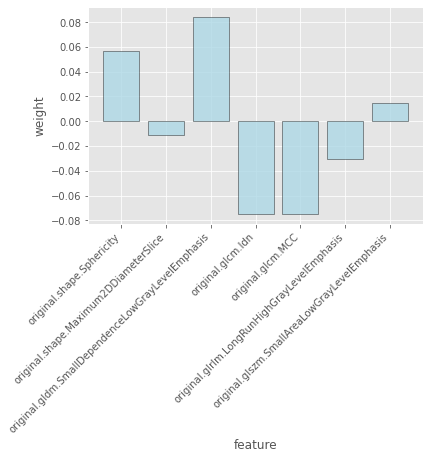

In [17]:
# 绘制特征权重图
import matplotlib.pyplot as plt
%matplotlib inline

x_values = np.arange(len(index))
y_values = coef[coef !=0]
plt.bar(x_values, y_values
        , color = 'lightblue'
        , edgecolor = 'black'
        , alpha = 0.8
       )
plt.xticks(x_values,index
           , rotation='45'
           , ha = 'right'
            ,va = 'top'
          )
plt.xlabel('feature')
plt.ylabel('weight')
plt.show()

NameError: name 'MultipleLocator' is not defined

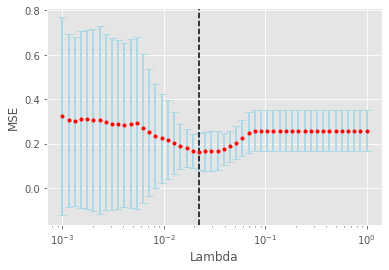

In [18]:
# Lambda图_
MSEs = lasso_cv.mse_path_

MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
MSEs_std = np.apply_along_axis(np.std,1,MSEs)

plt.figure() #dpi=300
plt.errorbar(lasso_cv.alphas_, MSEs_mean
            , yerr=MSEs_std
            , fmt="o"
            , ms=3
            , mfc="r"
            , mec="r"
            , ecolor="lightblue"
            , elinewidth=2
            , capsize=4
            , capthick=1)
plt.semilogx()
plt.axvline(lasso_cv.alpha_, color='black',ls='--')
plt.xlabel('Lambda')
plt.ylabel('MSE')
ax = plt.gca()
y_major_locator = MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show

In [48]:
# RadiomicScore计算
X_SS[X.columns[lasso_cv.coef_!=0]]
X_SS_Radscore = X_SS[X.columns[lasso_cv.coef_!=0]]* 

,original.shape.Sphericity,original.shape.Maximum2DDiameterSlice,original.gldm.SmallDependenceLowGrayLevelEmphasis,original.glcm.Idn,original.glcm.MCC,original.glrlm.LongRunHighGrayLevelEmphasis,original.glszm.SmallAreaLowGrayLevelEmphasis
0,0.302521,-1.074269,1.881111,-1.186314,-1.146018,-0.671789,1.879805
1,0.828694,0.344398,-0.225124,-0.739870,-1.280120,-0.548513,-0.293106
2,-0.472820,-0.439512,-1.125611,1.314683,1.260173,2.351706,-1.297865
3,-1.270269,1.852235,-0.699989,1.021994,1.178780,-0.172125,-1.115463
4,-1.037350,-0.271736,1.477840,-1.268712,-1.138042,-0.658642,1.633581
5,-0.682053,1.267116,-0.557589,0.023608,0.440095,-0.455761,0.135653
6,-0.258169,-0.341645,0.318028,-0.649166,-0.432252,-0.600102,1.031807
7,0.857563,-0.123955,-1.083978,1.198554,1.110358,0.879747,-1.253613
8,-0.030269,-1.182634,1.747562,-0.662593,-1.057940,-0.673681,1.033127
9,0.865427,-1.918920,0.575553,-0.614986,-0.503871,-0.612779,0.464263


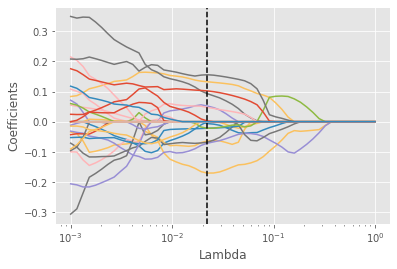

In [19]:
# 特征值随Lambda取值变化图
coefs = lasso_cv.path(X_SS, y, alphas=alphas, max_iter=100000)[1].T
plt.figure()
plt.semilogx(lasso_cv.alphas_, coefs, '-')
plt.axvline(lasso_cv.alpha_, color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

In [30]:
# 导入数据
Clin_Radio_demographic = pd.read_csv('https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2_MultiVA_rearranged.csv')
CR_dg = Clin_Radio_demographic.drop(['Specification','Name','TYPE','BCLC_stage','Gender'], axis=1)
CR_dg.head()

,ORR,HAIC_sesion,Bilobal,Over7cm,Infiltration,Arterial_enhanced,Delay_enhanced,Uniformly_enhanced,Age,Previous_treatment,...,LY,NEUT,PLT,PT,INR,FIB,CP_score,PVTT,VP_grade,metastatesis
0,1,3,0,1,1,0,0,0,58,0,...,1.17,4.36,161,14.4,1.11,2.86,6,1,3,0
1,1,2,0,1,0,1,1,0,53,1,...,0.93,4.55,234,14.9,1.27,3.56,6,1,2,1
2,1,3,1,1,0,0,1,0,57,0,...,1.43,3.41,78,12.8,1.11,2.59,5,1,3,0
3,1,2,0,0,1,0,1,0,67,2,...,2.72,3.09,146,12.5,1.08,2.28,6,0,0,1
4,1,3,0,1,0,1,0,1,58,0,...,4.84,1.89,164,14.8,1.26,2.38,8,1,2,0


In [24]:
CR_dg.columns

Index(['HAIC_sesion', 'Bilobal', 'Over7cm', 'Infiltration',
       'Arterial_enhanced', 'Delay_enhanced', 'Uniformly_enhanced', 'Age',
       'Previous_treatment', 'HBV', 'AFP', 'ALT', 'AST', 'ALB', 'TBIL', 'WBC',
       'LY', 'NEUT', 'PLT', 'PT', 'INR', 'FIB', 'CP_score', 'PVTT', 'VP_grade',
       'metastatesis'],
      dtype='object')

In [31]:
# 转化变量
from pandas.api.types import CategoricalDtype

to_convert = ['ORR','HAIC_sesion', 'Bilobal', 'Over7cm', 'Infiltration',
              'Arterial_enhanced', 'Delay_enhanced', 'Uniformly_enhanced',
              'Previous_treatment','PVTT', 'VP_grade',
              'metastatesis']
CR_dg[to_convert] = CR_dg[to_convert].astype('category')
CR_dg.dtypes

ORR                   category
HAIC_sesion           category
Bilobal               category
Over7cm               category
Infiltration          category
Arterial_enhanced     category
Delay_enhanced        category
Uniformly_enhanced    category
Age                      int64
Previous_treatment    category
HBV                      int64
AFP                    float64
ALT                      int64
AST                      int64
ALB                    float64
TBIL                   float64
WBC                    float64
LY                     float64
NEUT                   float64
PLT                      int64
PT                     float64
INR                    float64
FIB                    float64
CP_score                 int64
PVTT                  category
VP_grade              category
metastatesis          category
dtype: object

In [46]:
import statsmodels.api as sm


X_multiVA = CR_dg.drop(['ORR'],axis=1)
y_multiVA = CR_dg['ORR']

model = sm.OLS(y_multiVA,X_multiVA)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ORR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.180e+22
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.62e-23
Time:                        00:08:14   Log-Likelihood:                 641.31
No. Observations:                  24   AIC:                            -1239.
Df Residuals:                       2   BIC:                            -1213.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
HAIC_sesion           -0.4569   1.38e-12  -3.32e+11      0.000      -0.457      -0.457
Bilobal               -0.1725   3.05e-12  -5.66e+10      0.000      -0.172      -0.172
Over7cm                1.2394    4.2e-12   2.95e+11      0.000       1.239       1.239
Infiltration           0.2833   1.59e-12   1.78e+11      0.000       0.283       0.283
Arterial_enhanced     -1.1266   3.89e-12   -2.9e+11      0.000      -1.127      -1.127
Delay_enhanced         0.7545   2.55e-12   2.96e+11      0.000       0.755       0.755
Uniformly_enhanced    -0.9781    1.8e-12  -5.45e+11      0.000      -0.978      -0.978
Age                    0.0660   9.49e-14   6.96e+11      0.000       0.066       0.066
Previous_treatment     0.9234   3.76e-12   2.46e+11      0.000       0.923       0.923
HBV                    0.3881   8.91e-13   4.36e+11      0.000       0.388       0.388
AFP                -6.094e-05   1.29e-16  -4.74e+11      0.000   -6.09e-05   -6.09e-05
ALT                   -0.0030   1.93e-14  -1.54e+11      0.000      -0.003      -0.003
AST                    0.0327   7.26e-14   4.51e+11      0.000       0.033       0.033
ALB                    0.0760   3.14e-13   2.42e+11      0.000       0.076       0.076
TBIL                   0.0002   3.45e-14   6.17e+09      0.000       0.000       0.000
WBC                   -1.0703   2.55e-12  -4.19e+11      0.000      -1.070      -1.070
LY                     0.4853   1.17e-12   4.14e+11      0.000       0.485       0.485
NEUT                   0.5641   1.76e-12    3.2e+11      0.000       0.564       0.564
PLT                    0.0148   3.54e-14   4.18e+11      0.000       0.015       0.015
PT                     0.0783    8.8e-13    8.9e+10      0.000       0.078       0.078
INR                    0.3594   2.41e-12   1.49e+11      0.000       0.359       0.359
FIB                    0.4149   1.34e-12    3.1e+11      0.000       0.415       0.415
CP_score              -1.4451   3.23e-12  -4.47e+11      0.000      -1.445      -1.445
PVTT                   0.1383    3.3e-12    4.2e+10      0.000       0.138       0.138
VP_grade              -0.3293   1.19e-12  -2.78e+11      0.000      -0.329      -0.329
metastatesis          -0.0967   2.21e-12  -4.37e+10      0.000      -0.097      -0.097
==============================================================================
Omnibus:                       44.805   Durbin-Watson:                   2.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.879
Skew:                           3.200   Prob(JB):                     4.39e-46
Kurtosis:                      15.959   Cond. No.                     3.84e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct